NAME:- P.SARAVANAN
INDEX NUMBER:- 190568F

In [67]:
import numpy as np
from numpy.linalg import inv

In [68]:
# RANSAC FUNCTIONS

def RandomPoints(data, n):
    #To get n random points from data set
    count = 0
    sample = []

    while count < n:
        index = np.random.randint(len(data))
        x = data[index][0]
        y = data[index][1]

        if (x, y) not in sample:
            sample.append((x, y))
            count += 1

    return sample


def CircleParams(sample):
    #to get circle parameters from sample
    point1 = sample[0]
    point2 = sample[1]
    point3 = sample[2]

    A = np.array([[point2[0] - point1[0], point2[1] - point1[1]], [point3[0] - point2[0], point3[1] - point2[1]]]) 
    B = np.array([[point2[0]**2 - point1[0]**2 + point2[1]**2 - point1[1]**2], [point3[0]**2 - point2[0]**2 + point3[1]**2 - point2[1]**2]])		
    inv_A = inv(A)

    a, b = np.dot(inv_A, B) / 2
    a, b = a[0], b[0]
    r = np.sqrt((a - point1[0])**2 + (b - point1[1])**2)

    return (a, b, r)

def InliersAndDistance(circle, data, threshold):
    x_data = data[:, 0]
    y_data = data[:, 1]

    a = circle[0]
    b = circle[1]
    r = circle[2]

    total_distance = 0
    inliers = []
    for i in range(len(x_data)):
        distance = np.sqrt((x_data[i] - a)**2 + (y_data[i] - b)**2)

        if abs(distance - r) <= threshold:
            inliers.append([x_data[i], y_data[i]])
            total_distance += abs(distance - r)
    
    return inliers, total_distance

Best model not found


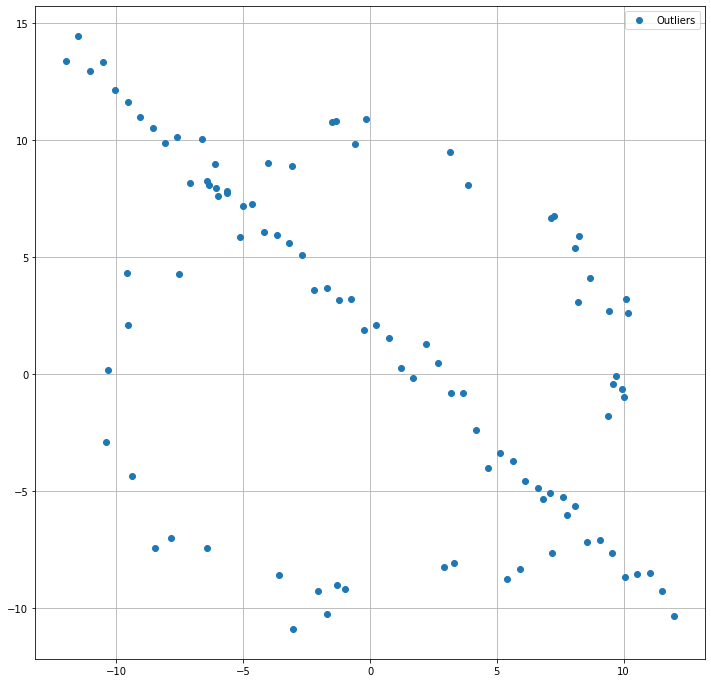

In [69]:
#Question 1)
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

N = 100
half_n = N//2

R = 10
s = R/16
t = np.random.uniform(0, 2*np.pi ,half_n)
n = s*np.random.randn(half_n)

x ,y = (R + n)*np.cos(t), (R + n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n , 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(X[:,0], X[:, 1], 'o', label='Outliers')
ax.grid(True)

#initialization  variables
x_data = X[:, 0]
y_data = X[:, 1]
iterations = 35
inlier_threshold = R/8
inlier_count_threshold = 50
best_model = [0, 0, 999999, []]

#running of  iterations
for i in range(iterations):
    #to get three points from dataset
    sample = RandomPoints(X, 3)
    
    # Calculate circle parameters from sample three points
    initial_circle = CircleParams(sample)

    # to eliminate large circles
    if abs(R - initial_circle[2]) > 1.5*R:
        continue
    
    #Calculation of initial inliers 
    inliers, toal_distance = InliersAndDistance(initial_circle, X, inlier_threshold)
    
    # If inlier count is less start from beginning
    if len(inliers) < inlier_count_threshold:
        continue

    # Get three points from inliers
    inlier_sample = RandomPoints(inliers, 3)
    
    # Calculate circle parameters from  inlier points
    circle = CircleParams(inlier_sample)

    #calculate new inliers and total absolute distance
    inliers, toal_distance =InliersAndDistance(circle, X, inlier_threshold)
    
    #if inlier count is less start from beginning
    if len(inliers) < inlier_count_threshold:
        continue
    
    #if new circle has more inliers change best model to this new circle
    #if same amount of inliers make the best model with the circle that has less absolute distance
    if len(best_model[-1]) < len(inliers):
        best_model = [circle, initial_circle, sample, toal_distance, inliers]
    elif len(best_model[-1]) == len(inliers):
        if best_model[3] > toal_distance:
            best_model = [circle, initial_circle, sample, toal_distance, inliers]

if len(best_model[-1]) == 0:
    print("Best model not found")

else:
    inliers = np.array(best_model[-1])
    ax.plot(inliers[:, 0], inliers[:, 1], 'o', label='Inliers')

    best_samples = np.array(best_model[2])
    ax.plot(best_samples[:,0], best_samples[:, 1], 'o', label='Best Samples')

    a, b, r = best_model[0][0], best_model[0][1], best_model[0][2]
    circle = Circle((a, b), radius=r, color='r', fc='y', fill=False, label='RANSAC')
    ax.add_patch(circle)

    a, b, r = best_model[1][0], best_model[1][1], best_model[1][2]
    init_circle = Circle((a, b), radius=r, color='b', fc='y', fill=False, label='Circle estimated from Best sample')
    ax.add_patch(init_circle)

ax.legend();
s

In [70]:
def click_event(event, x, y, flags, params):
    #function for getting co-ordinates by mouse click
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)

def superimpose(im_src, im_dst, pts_src, pts_dst):
    #function to superimpose
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))
    return cv.add(im_out, im_dst)

(128, 255, 3)
(162, 312, 3)


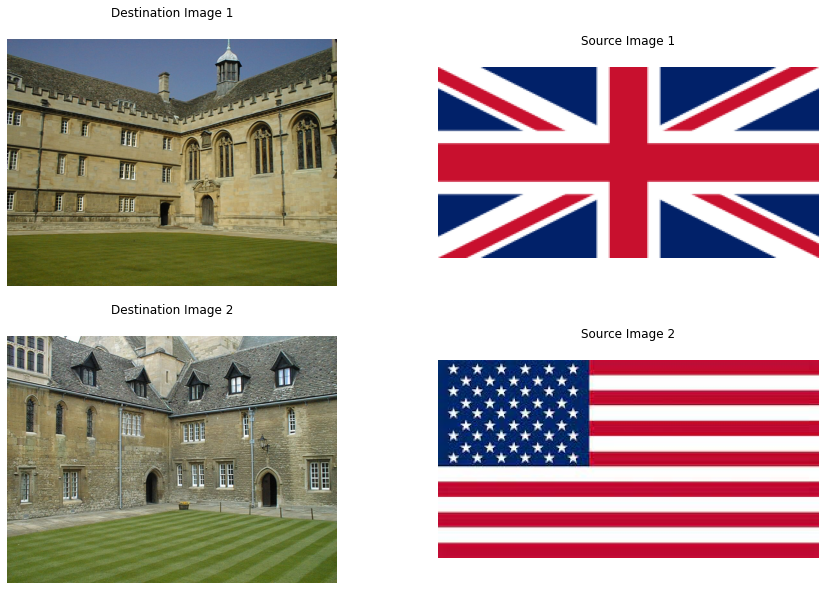

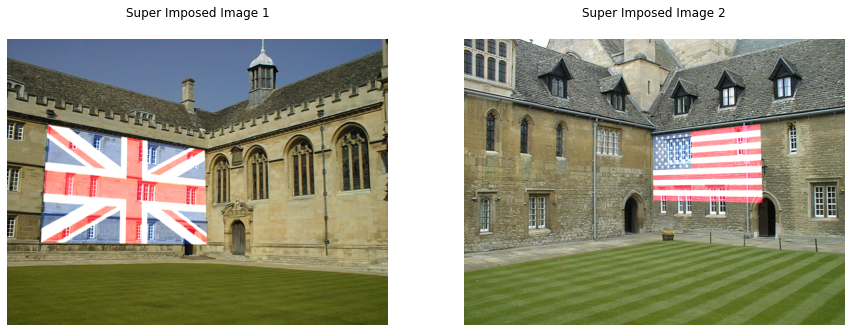

In [71]:
#Question 2)
import cv2 as cv

destination1 = cv.imread(r'002.jpg',cv.IMREAD_COLOR)
assert destination1 is not None

source1 = cv.imread(r'Flag_of_the_United_Kingdom.png',cv.IMREAD_ANYCOLOR)
assert source1 is not None

destination2 = cv.imread(r'merton.jpg',cv.IMREAD_COLOR)
assert destination2 is not None

source2 = cv.imread(r'USA.jpg',cv.IMREAD_ANYCOLOR)
assert source2 is not None

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(cv.cvtColor(destination1, cv.COLOR_BGR2RGB))
ax[0, 0].title.set_text('Destination Image 1')
ax[0, 0].axis('off')
ax[0, 0].xaxis.tick_top()

ax[0, 1].imshow(cv.cvtColor(source1, cv.COLOR_BGR2RGB))
ax[0, 1].title.set_text('Source Image 1')
ax[0, 1].axis('off')
ax[0, 1].xaxis.tick_top()

ax[1, 0].imshow(cv.cvtColor(destination2, cv.COLOR_BGR2RGB))
ax[1, 0].title.set_text('Destination Image 2')
ax[1, 0].axis('off')
ax[1, 0].xaxis.tick_top()

ax[1, 1].imshow(cv.cvtColor(source2, cv.COLOR_BGR2RGB))
ax[1, 1].title.set_text('Source Image 2')
ax[1, 1].axis('off')
ax[1, 1].xaxis.tick_top()

#4 corners from destination image
cv.imshow('image', destination1)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', destination2)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

# Four corners of the book in destination image
pts_dst1 = np.array([[110, 231], [530, 299], [536, 550], [92, 544]])
pts_dst2 = np.array([[508, 260], [839, 224],  [850, 538], [509, 510]])

#4 corners from source image
print(source1.shape)
print(source2.shape)

# 4 corners of the book in source image
pts_src1 = np.array([[0, 0], [254, 0], [254, 127], [0, 127]])
pts_src2 = np.array([[0, 0], [349, 0], [349, 232], [0, 232]])

# To get the superimposed image
superimposed1 = superimpose(source1, destination1, pts_src1, pts_dst1)
superimposed2 = superimpose(source2, destination2, pts_src2, pts_dst2)

fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].imshow(cv.cvtColor(superimposed1, cv.COLOR_BGR2RGB))
ax[0].title.set_text('Super Imposed Image 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(cv.cvtColor(superimposed2, cv.COLOR_BGR2RGB))
ax[1].title.set_text('Super Imposed Image 2')
ax[1].axis('off')
ax[1].xaxis.tick_top()

In [72]:
def getHomogrpahy(src_img, dst_img):
    # Initilization of SIFT detector
    sift = cv.SIFT_create()

    # obtain the keypoints and descriptors with SIFT
    keypoint1, des1 = sift.detectAndCompute(src_img, None)
    keypoint2, des2 = sift.detectAndCompute(dst_img, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)

    # store all the good matches
    Good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            Good.append(m)
    

    source_pts = np.float32([keypoint1[m.queryIdx].pt for m in Good]).reshape(-1,1,2)
    dest_pts = np.float32([keypoint2[m.trainIdx].pt for m in Good]).reshape(-1,1,2)
    H, mask = cv.findHomography(source_pts, dest_pts, cv.RANSAC, 0.95)

    return H

def matchSIFT(img1, img2):
    # Initiazation of SIFT detector
    sift = cv.SIFT_create()

    #To find the keypoints and descriptors with SIFT
    keypoint1, des1 = sift.detectAndCompute(img1, None)
    keypoint2, des2 = sift.detectAndCompute(img2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i] = [1,0]

    draw_params = dict(matchColor = (0, 255, 0),
                    singlePointColor = (255, 0, 0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
                    
    img3 = cv.drawMatchesKnn(img1, keypoint1, img2, keypoint2, matches, None, **draw_params)

    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255)
    ax.title.set_text('Matched Features')
    ax.axis('off')
    ax.xaxis.tick_top()
    

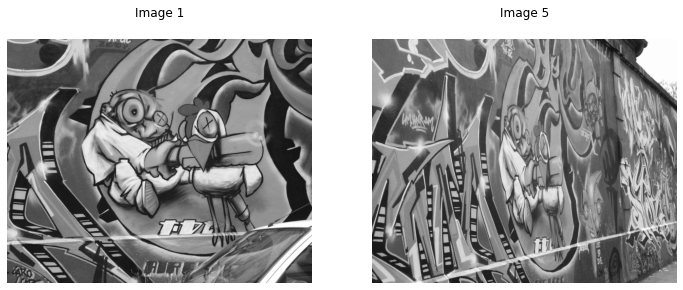

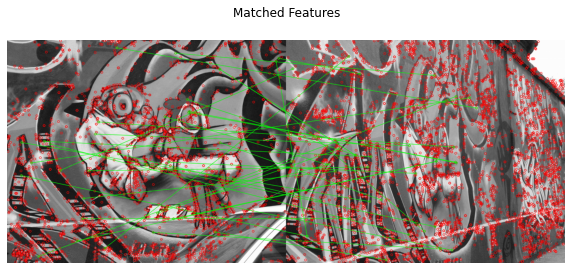

In [73]:
#Question 3)
#part a)
img1 = cv.imread(r'img1.ppm', cv.IMREAD_GRAYSCALE)
assert img1 is not None

img5 = cv.imread(r'img5.ppm', cv.IMREAD_GRAYSCALE)
assert img5 is not None

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img1, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].title.set_text('Image 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(img5, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('Image 5')
ax[1].axis('off')
ax[1].xaxis.tick_top()

matchSIFT(img1, img5)

In [75]:
#b)
H = np.identity(3)

for i in range(4):
    src_name = str(i + 1)+'.ppm'
    src_img = cv.imread(r'img'+src_name, cv.IMREAD_GRAYSCALE)
    assert src_img is not None

    dst_name = str(i + 2)+'.ppm'
    dst_img = cv.imread(r'img'+dst_name, cv.IMREAD_GRAYSCALE)
    assert dst_img is not None

    H = np.matmul(getHomogrpahy(src_img, dst_img), H)

print(H)

[[ 6.18702866e-01  6.21064343e-02  2.21651108e+02]
 [ 2.18151664e-01  1.16382849e+00 -2.51653502e+01]
 [ 4.83179132e-04 -3.03151623e-05  9.96618611e-01]]


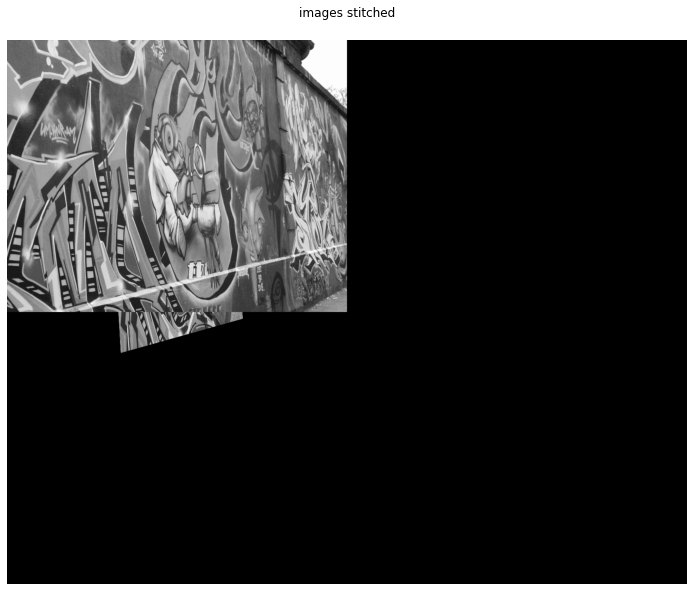

In [77]:
#c)
#wraped image
destination = cv.warpPerspective(src_img, H, (dst_img.shape[1] + src_img.shape[1], dst_img.shape[0] + src_img.shape[0])) 

#paste them together
destination[0:dst_img.shape[0], 0:dst_img.shape[1]] = dst_img

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(destination, cmap = 'gray', vmin = 0, vmax = 255)
ax.title.set_text('images stitched')
ax.axis('off')
ax.xaxis.tick_top()

In [ ]:
cap = 8000000
percentage = 0.15

for i in range(3):
    int = cap*percentage
    cap = cap + int
    print(cap)

print(2200000/48)

9200000.0
10580000.0
12167000.0
45833.333333333336
